In [1]:
import sys
if sys.platform.startswith('linux'): # or win
    print("in linux")
    file_path = "/home/ncslaber/109-2/tree_experiment/npy_depth/p_1_45/"
#     sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
else:
    file_path = r"G:/我的雲端硬碟/0327_align_depth/"

in linux


In [2]:
'''math tool'''
import csv
import numpy as np

'''plot tool'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker

'''image tool'''
import cv2
import pyrealsense2 as rs
import statistics as sta

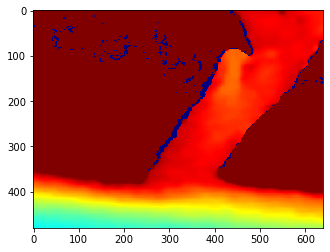

In [3]:
npDepth = []

npDepth = np.load(file_path+"21.npy")

npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.085) # 3m
npDepthF_color = cv2.applyColorMap(npDepthF, cv2.COLORMAP_JET)
%matplotlib inline
plt.imshow(cv2.cvtColor(npDepthF_color, cv2.COLOR_BGR2RGB))

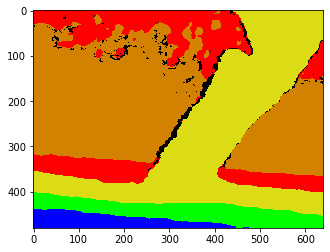

In [4]:
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npDepth_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npDepth_seg[npDepth<1500]=color_seq['blue']
npDepth_seg[np.logical_and(npDepth<2000,npDepth>1500)]=color_seq['green']
npDepth_seg[np.logical_and(npDepth<3000,npDepth>2000)]=color_seq['yellow']
npDepth_seg[np.logical_and(npDepth<6000,npDepth>3000)]=color_seq['red']
npDepth_seg[npDepth>6000]=color_seq['brown']
npDepth_seg[npDepth==0]=color_seq['black']

npDepth_seg = npDepth_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npDepth_seg, cv2.COLOR_BGR2RGB))

In [5]:
def depth(x,y):
    return npDepth[x][y]
class Point3D:
    x: int = 0
    y: int = 0
    z: int = 0
cx_d = 328 #424
cy_d = 241 #241
fx_d = 617 #424
fy_d = 617 #424

npPointX = np.asarray(range(640))-cx_d
npPointX = np.diag(npPointX)
npPointX = npDepth.dot(npPointX)/ fx_d * (-1)

npPointY = np.asarray(range(480))-cy_d
npPointY = np.diag(npPointY)
theta = 2/180*np.pi
npPointY = npPointY.dot(npDepth)/ fy_d * (-1) 
npPointY = npPointY*np.cos(theta) + npDepth * np.sin(theta) + 360

npPointY = npPointY.astype('float16')

float16


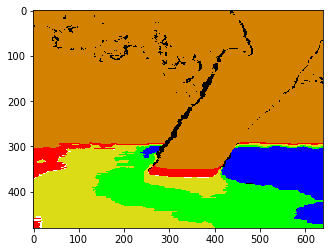

In [6]:
'''depth segmentation'''
npHeight = np.copy(npPointY)
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),
                'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npHeight_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npHeight_seg[npHeight<-160]=color_seq['blue']
npHeight_seg[np.logical_and(npHeight<-80,npHeight>-160)]=color_seq['green']
npHeight_seg[np.logical_and(npHeight<0,npHeight>-80)]=color_seq['yellow']
npHeight_seg[np.logical_and(npHeight<80,npHeight>0)]=color_seq['red']
npHeight_seg[npHeight>80]=color_seq['brown']
npHeight_seg[npHeight==360]=color_seq['black']
npHeight_seg[np.logical_and(npHeight<0.9,npHeight>-0.9)]=(255,255,255)
# print(*(npDepth[np.logical_and(npHeight<0.9,npHeight>-0.9)]))
print(npHeight.dtype)
npHeight_seg = npHeight_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npHeight_seg, cv2.COLOR_BGR2RGB))

238
-0.004201680672268907
-510
1322.142857142857


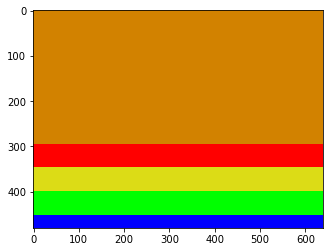

In [10]:
test = np.zeros_like(npDepth, dtype=np.int32)
test[:240]=6000
test[240:480]=-150-360

npPointY = np.asarray(range(480))-cy_d
npPointY[npPointY==0]=1
print(npPointY[479])
npPointY = -1/npPointY
npPointY = np.diag(npPointY)

print(npPointY[479][479])
print(test[479][0])
test = test*fy_d
test = npPointY.dot(test)
print(test[479][0])

'''depth segmentation'''
npDepth = np.copy(test)
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),
                'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npDepth_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npDepth_seg[npDepth<1500]=color_seq['blue']
npDepth_seg[np.logical_and(npDepth<2000,npDepth>1500)]=color_seq['green']
npDepth_seg[np.logical_and(npDepth<3000,npDepth>2000)]=color_seq['yellow']
npDepth_seg[np.logical_and(npDepth<6000,npDepth>3000)]=color_seq['red']
npDepth_seg[npDepth>6000]=color_seq['brown']
npDepth_seg[npDepth==0]=color_seq['black']

npDepth_seg = npDepth_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npDepth_seg, cv2.COLOR_BGR2RGB))

float16


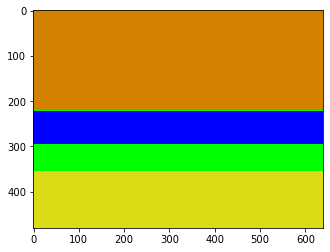

In [32]:
npDepth_test = np.copy(npDepth)

npPointY = np.asarray(range(480))-cy_d
npPointY = np.diag(npPointY)
theta = -2/180*np.pi
npPointY = npPointY.dot(npDepth)/ fy_d * (-1) 
npPointY = npPointY*np.cos(theta) + npDepth * np.sin(theta) + 360

npPointY = npPointY.astype('float16')

'''depth segmentation'''
npHeight = np.copy(npPointY)
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),
                'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npHeight_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npHeight_seg[npHeight<-160]=color_seq['blue']
npHeight_seg[np.logical_and(npHeight<-80,npHeight>-160)]=color_seq['green']
npHeight_seg[np.logical_and(npHeight<0,npHeight>-80)]=color_seq['yellow']
npHeight_seg[np.logical_and(npHeight<80,npHeight>0)]=color_seq['red']
npHeight_seg[npHeight>80]=color_seq['brown']
npHeight_seg[npHeight==360]=color_seq['black']
npHeight_seg[np.logical_and(npHeight<0.9,npHeight>-0.9)]=(255,255,255)
# print(*(npDepth[np.logical_and(npHeight<0.9,npHeight>-0.9)]))
print(npHeight.dtype)
npHeight_seg = npHeight_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npHeight_seg, cv2.COLOR_BGR2RGB))